In [1]:
import numpy as np 
import pandas as pd 

In [2]:
ds = pd.read_csv('heart.csv')
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
ds['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [4]:
ds = ds.dropna()

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      298 non-null    float64
 13  target    298 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.9 KB


In [6]:
ds.to_csv('heart.csv')

In [7]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values
print(y)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 0]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.48479272  0.70487967 -2.22553893 ...  2.29132893 -0.69904436
   1.17652738]
 [ 0.70126677  0.70487967  0.87199479 ...  0.65858556  0.41010602
   1.17652738]
 [-1.46347371 -1.41868186 -0.16051645 ... -0.97415781 -0.69904436
  -0.88999304]
 ...
 [ 0.80950379  0.70487967  0.87199479 ...  0.65858556  1.51925641
   1.17652738]
 [-0.59757752 -1.41868186 -1.19302769 ...  0.65858556 -0.69904436
  -0.88999304]
 [ 0.26831867  0.70487967  0.87199479 ...  0.65858556  0.41010602
   0.65989728]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

SEED = 1

In [12]:
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)
svr = SVR(kernel = 'rbf')
xg = XGBClassifier()

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Decision Tree', dt),
               ('Forest', rf),
               ('XGB', xg)]

In [13]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    print('{:s} : {:s}'.format(clf_name, classification_report(y_test, y_pred.round())))

Logistic Regression :               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.85      0.81        27

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

K Nearest Neighbours :               precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.78      0.78      0.78        27

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Decision Tree :               precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.71      0.74      0.73        27

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg 

In [14]:
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:s}'.format(classification_report(y_test, y_pred)))

Voting Classifier:               precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.73      0.81      0.77        27

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  8]
 [ 5 22]]


Guessing: ROC AUC=0.500
RF: ROC AUC=0.786


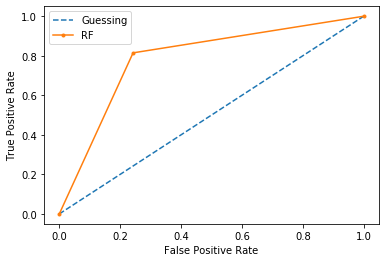

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs, multi_class="ovr")
lr_auc = roc_auc_score(y_test, y_pred)
print('Guessing: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Guessing')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RF')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.savefig("ROC.png", dpi = 1000)

In [17]:
from sklearn.externals import joblib
joblib.dump(lr, 'model.pkl')

C:\Users\gargy\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']